# Homework 4:  Practicing with NumPy + Matplolib via basic analysis and visualization of ARGO data 
### What is ARGO data?
- vertical profiles of pressure, temperature, salinity, etc. collected by a fleet of robotic instruments
- drift with the ocean currents, sinks and rises
- spend most of time under the surface! 
- the instruments collect extremely valuable data that helps us:
  - better estimate heat storage in the ocean (and thus sea level rise predictions)
  - better evaluate changes in salinity (and tie these to changes in global rainfall)

### Where is ARGO data collected?
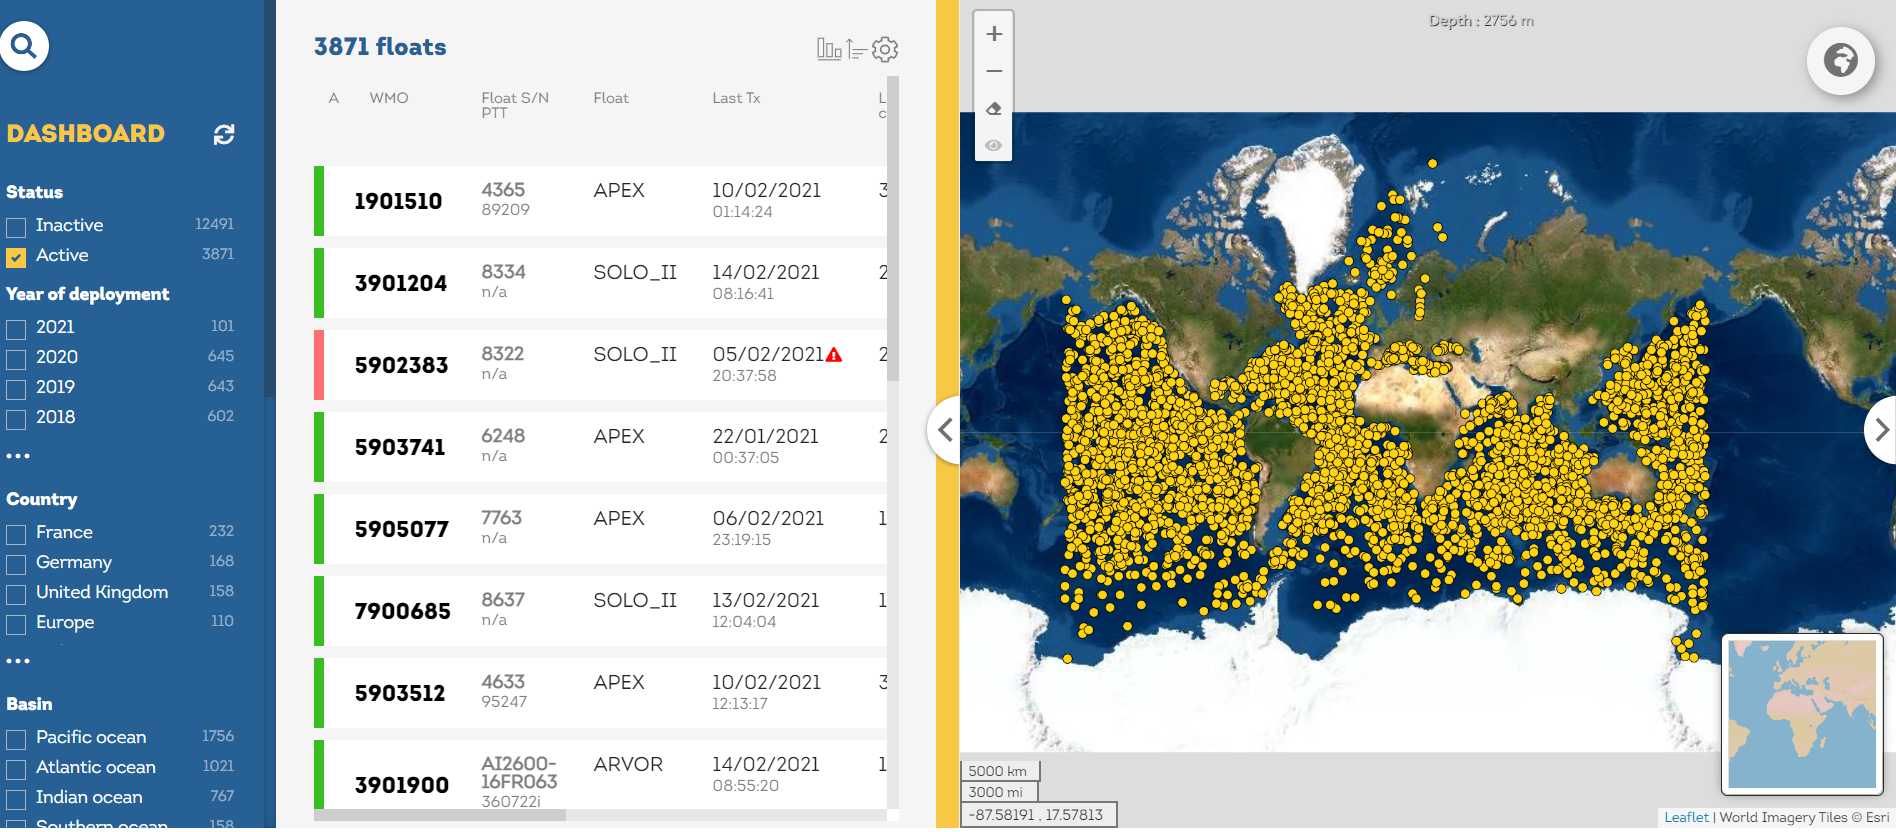  
(Can't see this image?  Visit: https://fleetmonitoring.euro-argo.eu/dashboard )
  
### Where can we access ARGO data?
- nice outline of options for data access: https://argo.ucsd.edu/data/
    - Example: http://www.argodatamgt.org/


### Want more information on ARGO data?
- https://argo.ucsd.edu/about/
- https://youtu.be/PzHZdwaBr_Q (neat video about the journey of an ARGO float!)


### How are we using ARGO data in this assignment?
- data from a single "float" (instrument), collected between 2012-2014, as it journeys through the ocean - drifting and sinking and rising!
<br><br>
- **variables**: 
  - temperature (in degrees C)
  - salinity (saltiness; in psu)
  - pressure (weight of ocean above; in dbar)
  - latitude (deg N or S)
  - longitude (deg E or W)
  - date (remember that the float drifts with the ocean currents.... so each vertical profile of temperature, salinity, and pressure is associated with a given date/time and a given location - i.e., the latitude/longitude point) 
<br><br>
- **format**:  special NumPy array format - since you haven't learned much yet about reading in and working with data from Netcdf files (which is native format of current ARGO data)
  - note: when you read in the data from the file, it is a data object that contains multiple arrays
     - you'll find soon that this is analogous to data objects in Xarray (package we use for spatial data, especially that of Netcdf format)

#### (a.)
- import the NumPy package
- import the pyplot package from the Matplotlib package

In [268]:
import numpy as np
from matplotlib import pyplot as plt

#### (b.)
- download the ARGO data from the Week 3 Assignment folder, 'argo_float_4901412.npz'

#### (c.)
- load the data file (I'll do this for you!)

In [269]:
# np.load loads in data from a special NumPy array file format
data = np.load('argo_float_4901412.npz')

# These are the arrays contained in this data object
# Salinity, temperature, vertical levels in the ocean, longitude, date/time, pressure, and latitude in the order they appear 
print(data.files)

['S', 'T', 'levels', 'lon', 'date', 'P', 'lat']


#### (d.)
- extract the arrays shown in (c.) to NumPy array variables of the same name
  - *hint*: T = data['T'] to access each array within the 'data' data object - like a key for a dictionary
- print out the values of the latitude, longitude, and date variables

In [270]:
# I'm going to instead reference these arrays through a common name to keep the code cleaner and more consistent.
# so that all references to data go through the same object
arrays = { key:value for (key, value) in data.items() }


In [271]:
print_list = ['lat', 'lon', 'date']
for k in print_list:
    print(f'{k}:\n\t{arrays[k]}\n')

lat:
	[47.187 46.716 46.45  46.23  45.459 44.833 44.452 44.839 44.956 44.676
 44.13  43.644 43.067 42.662 42.513 42.454 42.396 42.256 42.089 41.944
 41.712 41.571 41.596 41.581 41.351 41.032 40.912 40.792 40.495 40.383
 40.478 40.672 41.032 40.864 40.651 40.425 40.228 40.197 40.483 40.311
 40.457 40.463 40.164 40.047 39.963 40.122 40.57  40.476 40.527 40.589
 40.749 40.993 41.162 41.237 41.448 41.65  42.053 42.311 42.096 41.683
 41.661 41.676 42.018 42.395 42.532 42.558 42.504 42.63  42.934 42.952
 42.777 42.722 42.601 42.457 42.379]

lon:
	[-39.13  -37.282 -36.9   -36.89  -37.053 -36.658 -35.963 -35.184 -34.462
 -33.784 -32.972 -32.546 -32.428 -32.292 -32.169 -31.998 -31.824 -31.624
 -31.433 -31.312 -31.107 -31.147 -31.044 -31.14  -31.417 -31.882 -32.145
 -32.487 -32.537 -32.334 -32.042 -31.892 -31.861 -31.991 -31.883 -31.89
 -31.941 -31.889 -31.724 -31.412 -31.786 -31.561 -31.732 -31.553 -31.862
 -32.389 -32.318 -32.19  -32.224 -32.368 -32.306 -32.305 -32.65  -33.093
 -33.263 -33.199

#### (e.)
- prove to yourself that each of the data structures is a NumPy array
- show me one example of this!

In [272]:
all_arrays = [ True if isinstance(arrays[array], np.ndarray) else False for array in arrays ]
assert(all(all_arrays))

#### (f.)
- evaluate and print out the shape of S, T, P, lat, lon, and levels  
- from your above evaluations, please identify what the two dimensions of S, T, and P are (and tell me in a comment)

In [285]:
print_list = [ 'S', 'T', 'P', 'lat', 'lon', 'levels']
for x in print_list:
    print(f'arrays[{x}]:\n\tshape: {np.shape(arrays[x])}\n\t')

#Dimensions:
# It seems that the 0th dimension indicates the measurement of the 
# parameter of interest at a given level, and the second allows
# those measurements to be recorded progressively over time and position.

# This took me EMBARRASINGLY long to divine. :)

arrays[S]:
	shape: (78, 75)
	
arrays[T]:
	shape: (78, 75)
	
arrays[P]:
	shape: (78, 75)
	
arrays[lat]:
	shape: (75,)
	
arrays[lon]:
	shape: (75,)
	
arrays[levels]:
	shape: (78,)
	


#### (g.) evaluate/calculate and print:
- are there NaNs?
- if so, how many there are in each array (S, T, and P)
- how this compares to the total # of elements in each array (S, T, and P)
- the percent of NaNs in each array (S, T, and P) (relative to the total # of data points in each array)

In [286]:
for key in print_list:
    if key not in ['S','T','P']:
        continue
    nan_mask = np.isnan(arrays[key])
    print(f'''{key}:\n\tNumber of NaN: {np.count_nonzero(nan_mask)}
            \n\tTotal number of elements: {np.size(arrays[key])}
            \n\tPercent NaN: {np.count_nonzero(nan_mask) / np.size(arrays[key]):.2f}%\n''')

S:
	Number of NaN: 101
            
	Total number of elements: 5850
            
	Percent NaN: 0.02%

T:
	Number of NaN: 101
            
	Total number of elements: 5850
            
	Percent NaN: 0.02%

P:
	Number of NaN: 91
            
	Total number of elements: 5850
            
	Percent NaN: 0.02%



#### (h.) calculate and print the maximum and minimum value of each array (S, T, and P), over ALL depths and latitude/longitude points

In [275]:
for key in print_list:
    if key not in ['S','T','P']:
        continue
    nan_mask = np.isnan(arrays[key])
    big = np.max(arrays[key][~nan_mask])
    small = np.min(arrays[key][~nan_mask])
    print(f'''{key}:\n\t
            \n\tMax: {big}
            \n\tMin: {small}''')

S:
	
            
	Max: 36.2849006652832
            
	Min: 34.89790344238281
T:
	
            
	Max: 24.364999771118164
            
	Min: 3.5320000648498535
P:
	
            
	Max: 2001.5
            
	Min: 0.30000001192092896


#### (i.) 
*Keep in mind that you've shown that S, T, and P are two dimensional variables and what each dimension is. Now:*
- create a line plot for each of these variables, initially just for the *first* latitude/longitude point 
   - we want the vertical axis of this plot to be the vertical levels in the ocean 
      - please reverse the vertical axis, so it reads, from top to bottom, 0 to 77, as the "higher" values of the 'level' variable are actually points *deeper* in the ocean
   - and the horizontal axis of this plot to be the quantity of interest
   - you must label both axises (including units - see start of assignment), and add a title 

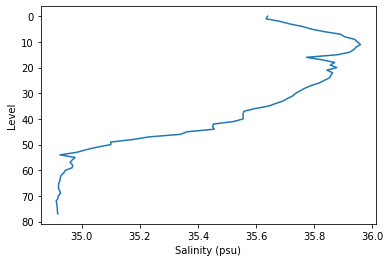

In [276]:
plt.xlabel('Salinity (psu)')
plt.ylabel('Level')
plt.gca().invert_yaxis()
plt.plot(arrays['S'][:,0], arrays['levels'])

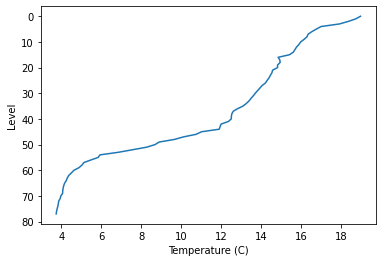

In [277]:
plt.xlabel('Temperature (C)')
plt.ylabel('Level')
plt.gca().invert_yaxis()
plt.plot(arrays['T'][:,0], arrays['levels'])

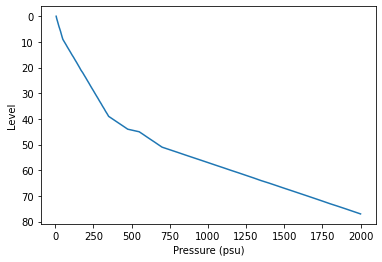

In [278]:
plt.xlabel('Pressure (psu)')
plt.ylabel('Level')
plt.gca().invert_yaxis()
plt.plot(arrays['P'][:,0], arrays['levels'])

#### (j.) 
- now, let's take your plotting up a notch!
- you'll still create THREE plots in total, one for each S, P, and T
  - with appropriate titles, axis labels, etc.
- but now you'll have many profiles on the same plot -- data of that variable collected at ALL lat/lon gridpoints contained in the dataset
   - no legends necessary
- there are multiple ways to do this
   - the simplest involves being clever in your line(s) of code that does the plotting 
<br><br>
- *option if you want to challenge yourself - ungraded*
  - instead, plot all three of the above-described plots on a single plot that consists of 3 subplots 

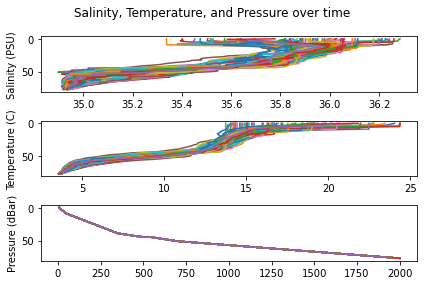

In [279]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.suptitle('Salinity, Temperature, and Pressure over time')
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax1.set_ylabel('Salinity (PSU)')
ax2.set_ylabel('Temperature (C)')
ax3.set_ylabel('Pressure (dBar)')

ax1.plot(arrays['S'], arrays['levels'])
ax2.plot(arrays['T'], arrays['levels'])
ax3.plot(arrays['P'], arrays['levels'])
plt.tight_layout()

#### (k.)
- time to plot the locations where all these profiles were collected!
  - including axis labels!
- you haven't formally learned how to create a map yet, so simply use a scatter plot
<br><br>
- *options if you'd like to challenge yourself - ungraded*
  - know how to create maps?  plot this data on a map instead of scatter plot!
  - color-code the points by date!

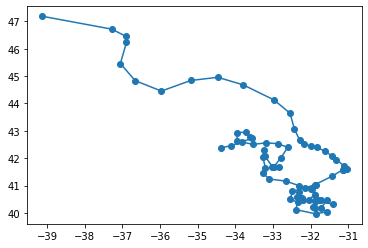

In [280]:
plt.plot(arrays['lon'], arrays['lat'], marker='o')

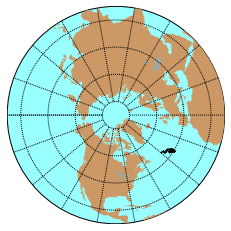

In [281]:
# Ignore this, its to get things working in my Docker container
import os
os.environ['PROJ_LIB'] = '/usr/share/proj/'

# Make a map, just like old times...
# Let's use a fun projection since this guy was off floating around out beyond the Wall
from mpl_toolkits.basemap import Basemap
m = Basemap(projection='npaeqd', boundinglat=10, lon_0=-90, round=True)
x, y = m(arrays['lon'], arrays['lat'])

m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966', lake_color='#99aaaa')
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.scatter(x, y, 1, marker='x', color='k')
plt.show()

#### (l.)
- calculate the mean for each T, S, and P at each vertical level
- and create plots like you did in **(i.)**, but now using these mean values
- so you'll have three plots in this step, and each plot will just have ONE vertical profile plotted on it

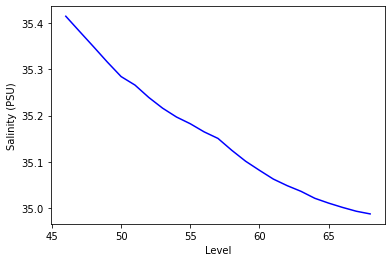

In [282]:
s_mean = np.mean(arrays['S'], axis=1)
plt.xlabel('Level')
plt.ylabel('Salinity (PSU)')
plt.plot(arrays['levels'], s_mean, 'b-')

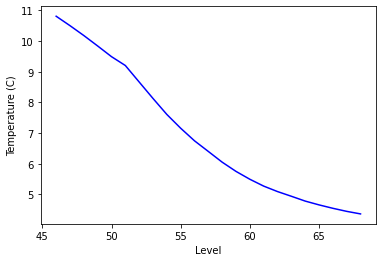

In [283]:
t_mean = np.mean(arrays['T'], axis=1)
plt.xlabel('Level')
plt.ylabel('Temperature (C)')
plt.plot(arrays['levels'], t_mean, 'b-')

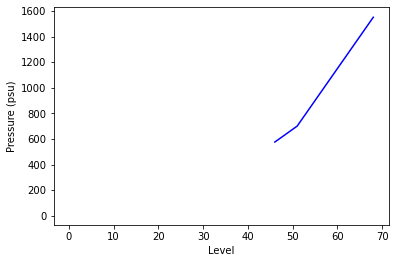

In [284]:
p_mean = np.mean(arrays['P'], axis=1)
plt.xlabel('Level')
plt.ylabel('Pressure (psu)')
plt.plot(arrays['levels'], p_mean, 'b-')

# This pressure data has more holes than dino DNA
ok, i just wanted to make a Jurassic Park joke.